In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Maze dimensions (n by n).
n = 70

# Coordinates of the maze center.
xc = n/2
yc = n/2

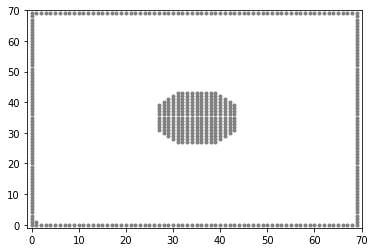

In [2]:
def is_exit(position): # test if position is an absorption site (set A union B)
    i, j = position
    # The set B comprises the maze boundary and the middle circle.
    # The set A comprises the point (1,1).
    return (i == 0 or j == 0 or i == n-1 or j == n-1  # On the maze boundary?
            or is_good_exit(position)                 # In the set A (the point (1,1))?
            or np.linalg.norm([i-xc,j-yc]) < 9)       # In the middle circle?

def is_good_exit(position): # test if position is a good absorption site (the set A)
    i, j = position
    # The set A comprises the point (1,1).
    return i==1 and j==1


# Plot the points comprising the elements of A union B (i.e., the absorption sites).

plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.show()

In [3]:

# Construct the transition matrix P.

P = np.zeros( (n,n,n,n) )  # transition probabilities of the unconditional chain
for i in range(n):
    for j in range(n): 
        if not(is_exit( (i,j) )):
            # If the position (i,j) is not an absorption site, make all adjacent positions (including diagonals)
            # equally likely to be the next position of the walk.
            for possible_move in [(i+1,j), (i+1, j+1), (i, j+1),
                                  (i-1,j+1), (i-1,j), (i-1,j-1),
                                  (i,j-1), (i+1,j-1)]:
                xnew, ynew = possible_move
                P[i,j,xnew,ynew] = 1
            
            # Normalize to get probabilities.
            s = np.sum(P[i,j,:,:])
            P[i,j,:,:] = (1.0 / s ) * P[i,j,:,:]
        else:
            # If the position (i,j) is an absorption site, indicate this in the transition matrix.
            P[i,j,i,j] = 1.0



In [4]:
# Solve the linear system defining h in the definition of the transformed transition matrix.

a = np.zeros( (n,n,n,n) ) # linear system, see the np.linalg.tensorsolve documentation
for i in range(n):
    for j in range(n):
        # Indicate that h is harmonic at the state (i,j).
        if not(is_exit( (i,j) )):
            a[i,j,:,:] = - P[i,j,:,:]
            
        a[i,j,i,j] = 1

b = np.zeros( (n,n) ) # boundary conditions: 1 for good exists and 0 for others.
for i in range(n):
    for j in range(n):
        # Indicate the appropriate boundary conditions: if (i,j) is in A, set b[i,j]=1; if (i,j) is in B,
        # set b[i,j]=0.
        if is_good_exit( (i,j) ):
            b[i,j] = 1.0


# Solve the linear system for h.
good_exit_probabilities = np.linalg.tensorsolve(a, b)



In [5]:
# Compute the transformed transition matrix.

P_transformed = np.zeros_like(P)
for i in range(n):
    for j in range(n):
        if not(is_exit( (i,j) )):
            # If the position (i,j) is not an absorption site, compute using the formula given in Exercise 1.
            for x in range(n):
                for y in range(n):
                    P_transformed[i,j,x,y] = P[i,j,x,y] * good_exit_probabilities[x,y] / good_exit_probabilities[i,j]
        else: # absorption once it reaches an exit
            P_transformed[i,j,i,j] = 1.0


In [6]:

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

all_points = [Point(i,j) for i in range(n) for j in range(n)]

# Starting coordinates.
x0 = n-2
y0 = n-2

current = Point(x0, y0)
x_visited = []
y_visited = []

# Run the walk until it hits an absorption site.
while(True):
    # Sample the next position according to the transformed transition matrix and the current position.
    current = np.random.choice(
        all_points,
        1, # return one random element
        p=np.array([P_transformed[current.x, current.y, p.x, p.y] for p in all_points ])
                  )[0]
    
    # Keep track of where the walk has visited.
    x_visited.append(current.x)
    y_visited.append(current.y)
    
    # Stop walking if we hit an absorption site.
    if is_exit( (current.x, current.y) ):
        break
    
    

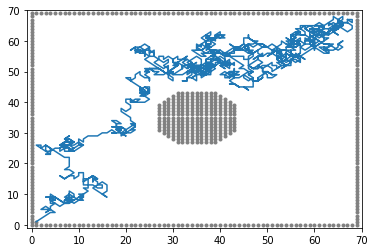

In [7]:
# Plot the maze and the trajectory of the walk.

plt.plot(x_visited, y_visited)
plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.show()




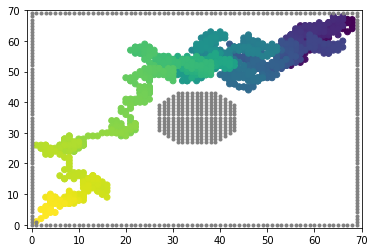

In [8]:
# Plot the maze and the trajectory of the walk. Each position in the walk is colored based on the time the walk
# last visited that location.

plt.scatter(x_visited, y_visited,
            c=[i for i in range(len(x_visited))])

plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.xlim(-1,n)
plt.ylim(-1,n)

plt.show()